## D. Kinney DSC 550 9.3 Exercise: Neural Network Classifiers

1. **Neural Network Classifier with Scikit**

Using the multi-label classifier dataset from earlier exercises (categorized-comments.jsonl in the reddit folder), fit a neural network classifier using scikit-learn. Use the code found in chapter 12 of the Applied Text Analysis with Python book as a guideline. Report the accuracy, precision, recall, F1-score, and confusion matrix.

2. **Neural Network Classifier with Keras**

Using the multi-label classifier dataset from earlier exercises (categorized-comments.jsonl in the reddit folder), fit a neural network classifier using Keras. Use the code found in chapter 12 of the Applied Text Analysis with Python book as a guideline. Report the accuracy, precision, recall, F1-score, and confusion matrix.

3. **Classifying Images**

In chapter 20 of the Machine Learning with Python Cookbook, implement the code found in section 20.15 classify MSINT images using a convolutional neural network. Report the accuracy of your results.

*********************************************
#### 1. Neural Network Classifier with Scikit

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
df = pd.read_json('data/categorized-comments.jsonl', lines=True, encoding='utf8')
df.head()

,cat,txt
0,sports,Barely better than Gabbert? He was significant...
1,sports,Fuck the ducks and the Angels! But welcome to ...
2,sports,Should have drafted more WRs.\n\n- Matt Millen...
3,sports,[Done](https://i.imgur.com/2YZ90pm.jpg)
4,sports,No!! NOO!!!!!


In [4]:
df['category_id'] = df['cat'].factorize()[0]
category_id_df = df[['cat', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'cat']].values)
df.sample(10)

,cat,txt,category_id
201205,video_games,"Tier 2 LAN or not, TNC placed 1st. WESG is lik...",2
93507,sports,"Forget that far back, can you imagine the shit...",0
116109,video_games,Check out /r/DestinySherpa/ and /r/fireteams\n...,2
364932,video_games,How do you call plays on PS3? I know the left ...,2
30904,sports,Exactly. Went to the place a couple times pure...,0
165709,video_games,deathball,2
391866,video_games,So far I haven't seen anything mentioned about...,2
76162,video_games,"Thanks, definitely going to give it a shot.",2
423566,video_games,The actual TV stand itself? It's just a VESA w...,2
383234,video_games,I went to one. Amazing,2


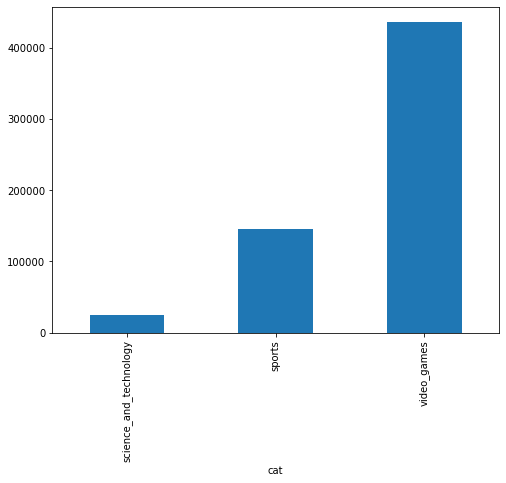

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('cat').txt.count().plot.bar(ylim=0)
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=100, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.txt).toarray()
labels = df.category_id
features.shape

(606474, 10794)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for txt, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['txt'], df['cat'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

*********************************************
#### 2. Neural Network Classifier with Keras

In [1]:
from keras.layers import Dense 
from keras.models import Sequential 

N_FEATURES = 5000 
N_CLASSES = 4 

def build_network():
    """ 
    Create a function that returns a compiled neural network 
    """ 
    nn = Sequential() 
    nn.add( Dense( 500, activation ='relu', input_shape =( N_FEATURES,))) 
    nn.add( Dense( 150, activation ='relu')) 
    nn.add( Dense( N_CLASSES, activation ='softmax')) 
    nn.compile( 
        loss ='categorical_crossentropy', 
        optimizer ='adam', 
        metrics =['accuracy'] ) 
    return nn

Using TensorFlow backend.


In [7]:
from sklearn.pipeline import Pipeline 
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.feature_extraction.text import TfidfVectorizer 

pipeline = Pipeline([ 
    ('norm', TextNormalizer()), 
    ('vect', TfidfVectorizer( max_features = N_FEATURES)), 
    ('nn', KerasClassifier( build_fn = build_network, 
                            epochs = 200, 
                            batch_size = 128)) ])

In [8]:
def train_model(path, model, saveto = None, cv = 12):
    corpus = PickledReviewsReader( path) 
    X = documents( corpus) 
    y = make_categorical( corpus) 
    scores = cross_val_score( model, X, y, cv = cv, scoring =' accuracy', n_jobs =-1) 
    model.fit( X, y) 
    return scores

In [9]:
cpath = '../review_corpus_proc'
mpath = 'ann_cls.pkl'
scores = train_model( cpath, pipeline, saveto = mpath, cv = 12)

NameError: name 'PickledReviewsReader' is not defined

*********************************************
#### 3. Classifying Images

In [7]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# Set that the color channel value will be first
K.set_image_data_format("channels_first")

# Set seed
np.random.seed(0)

# Set image information
channels = 1
height = 28
width = 28

# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], channels, height, width)

# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

# Start neural network
network = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(channels, width, height),
                   activation='relu'))

# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
network.add(Dropout(0.5))

# Add layer to flatten input
network.add(Flatten())

# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))

# Add dropout layer
network.add(Dropout(0.5))

# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))

# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
network.fit(features_train, # Features
            target_train, # Target
            epochs=2, # Number of epochs
            verbose=0, # Don't print description after each epoch

batch_size=1000, # Number of observations per batch
            validation_data=(features_test, target_test)) # Data for evaluation

Using TensorFlow backend.


In [8]:
score = network.evaluate(features_test, target_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09088441950436682
Test accuracy: 0.9721999764442444
